In [1]:
import pandas as pd
income = pd.read_csv('income.csv')
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


In [2]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [3]:
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

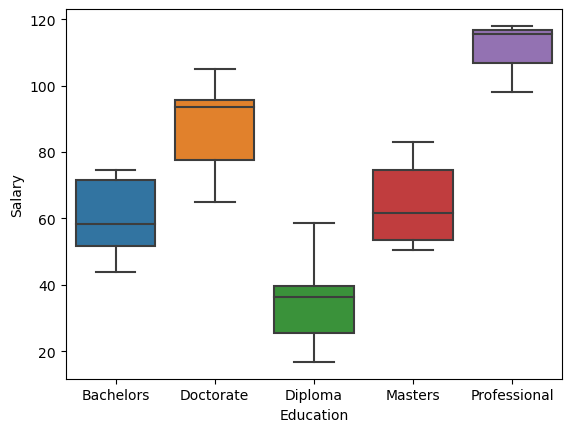

In [5]:
ax=sns.boxplot(data=income, x='Education',y='Salary')

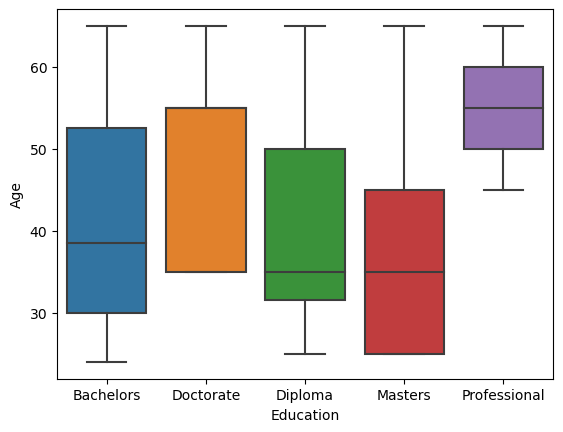

In [6]:
ax=sns.boxplot(data=income,x='Education',y='Age')

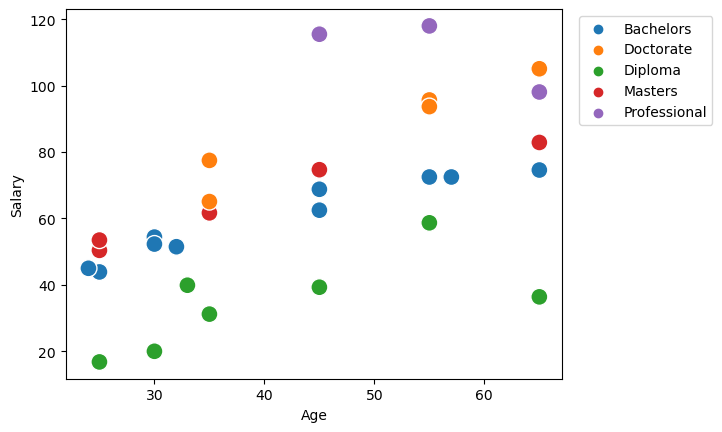

In [7]:
ax=sns.scatterplot(data=income,
                  x='Age',
                  y='Salary',
                  hue='Education',
                  s=150)
ax=plt.legend(bbox_to_anchor=(1.02,1),loc='upper left')

In [8]:
y=income[['Salary']]

In [9]:
x=income[['Age','Education']]

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1000)

In [92]:
x_test.value_counts()

Age  Education   
35   Doctorate       2
25   Masters         1
30   Bachelors       1
33   Diploma         1
45   Diploma         1
55   Bachelors       1
     Diploma         1
     Doctorate       1
57   Bachelors       1
65   Masters         1
     Professional    1
dtype: int64

In [93]:
x_train.head()

,Age,Education
16,45,Masters
2,45,Bachelors
18,45,Professional
20,24,Bachelors
21,25,Masters


In [94]:
x_train=pd.get_dummies(x_train)
x_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
16,45,0,0,0,1,0
2,45,1,0,0,0,0
18,45,0,0,0,0,1
20,24,1,0,0,0,0
21,25,0,0,0,1,0


In [95]:
x_test=pd.get_dummies(x_test)
x_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
24,33,0,1,0,0,0
25,35,0,0,1,0,0
3,55,1,0,0,0,0
27,57,1,0,0,0,0
11,45,0,1,0,0,0


In [96]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=420)

In [97]:
model = regressor.fit(x_train,y_train)

In [98]:
model.score(x_test,y_test)

0.678711544965034

In [99]:
y_pred=model.predict(x_test)

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

8.112499999999999

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,
               feature_names=list(x_train.columns),
               filled=True,
              max_depth=1);

In [ ]:
importance = model.feature_importances_
importance

In [ ]:
feature_importance = pd.Series(importance,index=x_train.columns)
feature_importance.sort_values().plot(kind='bar')
plt.ylabel('Importance')

In [66]:
model.score(x_train,y_train)

0.9927566209012075

In [67]:
model.score(x_test,y_test)

0.8858898538363444

In [70]:
path=regressor.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas=path.ccp_alphas
list(ccp_alphas)

[0.0,
 0.033611111111112126,
 0.16333333333321007,
 0.4281481481481624,
 1.3112037037037174,
 1.434074074074033,
 3.920416666666774,
 5.759999999999997,
 13.813611111111099,
 18.542939814814392,
 30.811250000000328,
 76.83199999999846,
 192.44958730158902,
 236.57160714285698]

In [72]:
# removing the largest value because its the trivial tree with one node
ccp_alphas=ccp_alphas[:-1]
list(ccp_alphas)

[0.0,
 0.033611111111112126,
 0.16333333333321007,
 0.4281481481481624,
 1.3112037037037174,
 1.434074074074033,
 3.920416666666774,
 5.759999999999997,
 13.813611111111099,
 18.542939814814392,
 30.811250000000328,
 76.83199999999846]

In [73]:
train_scores,test_scores=[],[]
for alpha in ccp_alphas:
    regressor_ = DecisionTreeRegressor(random_state=420,ccp_alpha=alpha)
    model_=regressor_.fit(x_train,y_train)
    train_scores.append(model_.score(x_train,y_train))
    test_scores.append(model_.score(x_test,y_test))

Text(0.5, 1.0, 'R squared by alpha')

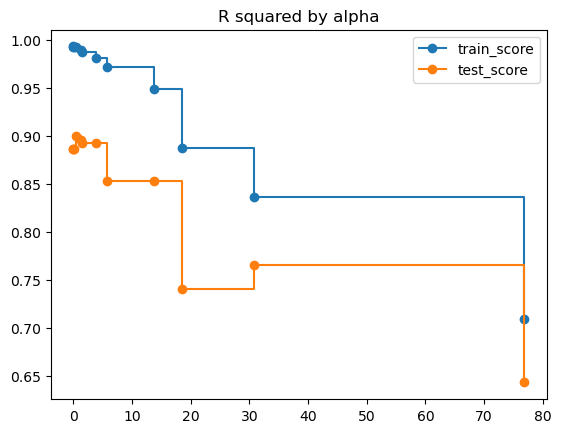

In [75]:
plt.plot(ccp_alphas,
         train_scores,
         marker='o',
         label='train_score',
         drawstyle='steps-post')
plt.plot(ccp_alphas,
         test_scores,
         marker='o',
         label='test_score',
         drawstyle='steps-post')
plt.legend()
plt.title('R squared by alpha')

In [81]:
ix=test_scores.index(max(test_scores))
best_alpha=ccp_alphas[ix]
best_alpha

0.4281481481481624

In [82]:
regressor_ = DecisionTreeRegressor(random_state=420,ccp_alpha=best_alpha)
model_=regressor_.fit(x_train,y_train)

In [83]:
model_.score(x_train,y_train)

0.991723404786097

In [84]:
model_.score(x_test,y_test)

0.8998115570055071

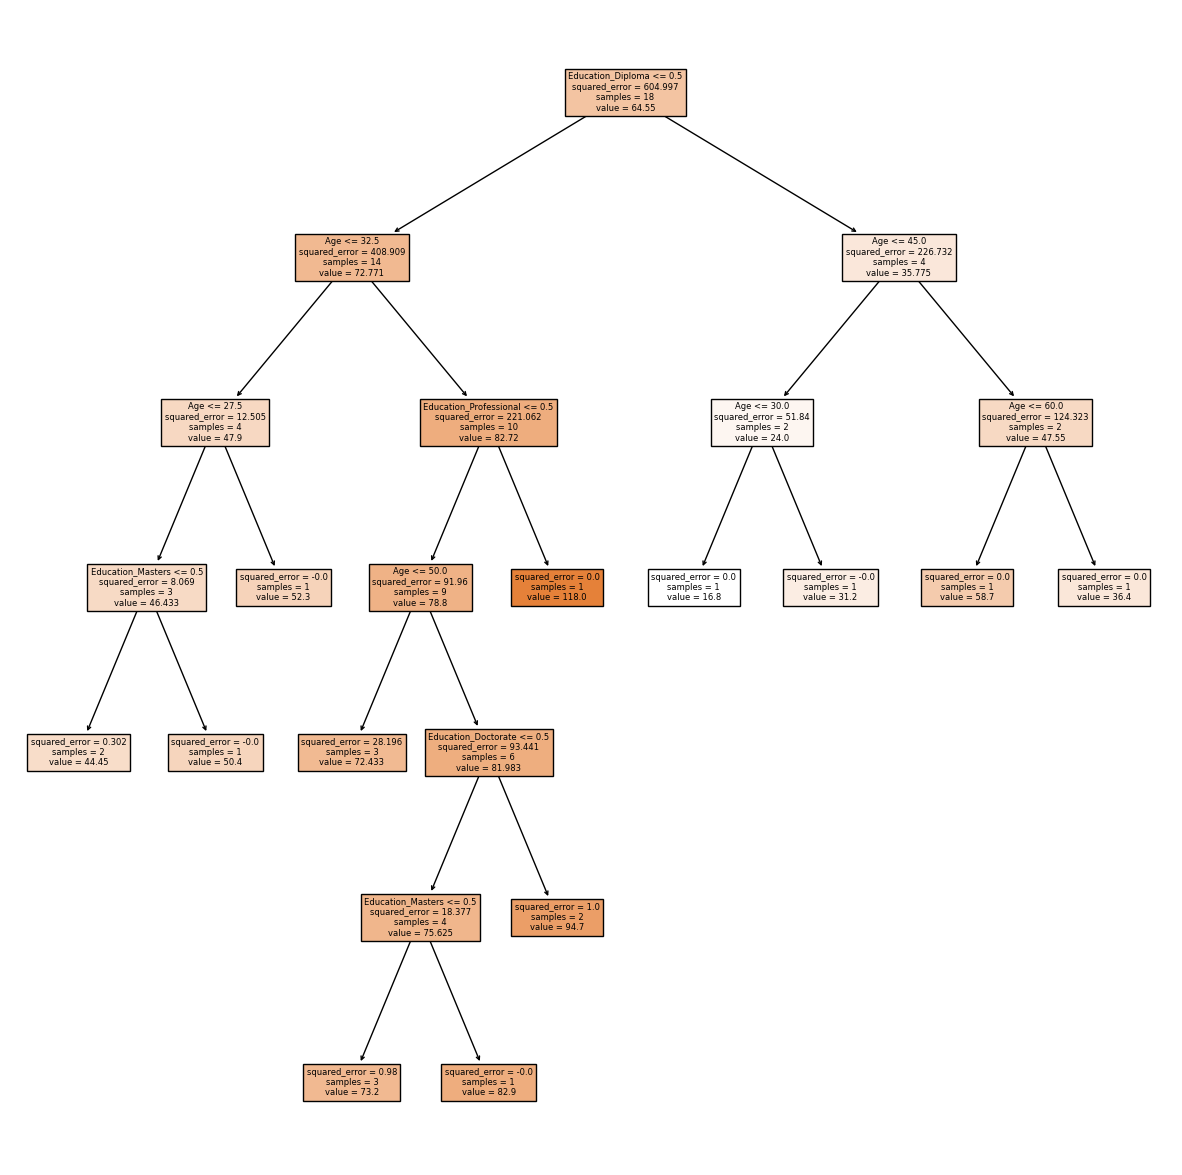

In [88]:
plt.figure(figsize=(15,15))
tree.plot_tree(model_,feature_names=list(x_train.columns),
              filled=True);